In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Percentile Cutoffs for Parent and Child Income by Birth Cohort

This table reports the dollar values (in 2015 dollars) corresponding to the percentile
thresholds used in Tables 1 and 2. We report thresholds for household income for parents and for three
different income concepts for children: (1) individual earnings, (2) household earnings (own plus spouse
wage earnings), and (3) household income (which includes capital income).

We provide cutoffs for all integer percentiles (from 0 to 99), as well as for the 99.5th, the 99.9th, and the
99.99th percentiles (corresponding to the Top 0.5%, Top 0.1%, and Top 0.01% of the income distributions).

The cutoffs vary by birth cohort, reflecting changes in the income distribution over time.
Following established disclosure standards, all dollar amounts are rounded to the nearest 100. 

- **pctile** - Income percentile
- **cohort** - child birth year
- **k_indv_earn** - Minimum individual earnings for children in this percentile in
their cohort (baseline income definition)
- **k_wagse_hh** - Minimum household income for children in this percentile in
their cohort
- **k_agi** - Minimum household earnings for children in this percentile in
their cohort
- **par_hh_inc** - Minimum household income for parents in this percentile
among parents with children in the same birth cohort

In [2]:
#Percentiles = pd.read_csv('percentile_cutoffs.csv',encoding = 'ISO-8859-1')
#df = pd.DataFrame(Percentiles)
#print(df)

### Table 5: Longitudinal Estimates by College and Cohort: Heterogeneity by Gender and Alternative College Definitions

This table reports estimates of parents’ and children’s income distributions by college and gender, separately by birth cohort.This data defines college based on attendance at age 20 instead of our baseline definition (the most attended college between ages 19-22). We censor any observation with fewer than 50 students.

- **type** - College Type :
    - 1 = public
    - 2 = private non-profit
    - 3 = for-profit
- **tier** - Selectivity and type combination:
    - 1 = Ivy Plus
    - 2 = Other elite schools (public and private)
    - 3 = Highly selective public
    - 4 = Highly selective private
    - 5 = Selective public
    - 6 = Selective private
    - 7 = Nonselective 4-year public
    - 8 = Nonselective 4-year private not-for-profit
    - 9 = Two-year (public and private not-for-profit)
    - 10 = Four-year for-profit
    - 11 = Two-year for-profit
    - 12 = Less than two year schools of any type
    - 13 = Attending college with insufficient data
    - 14 = Not in college between the years of 19-22
- **tier_name** - Name of college tier
- **iclevel** - Four-year or two-year college
    - 1 = Four-year
    - 2 = Two-year
    - 3 = Less than Two-year
- **region** - Census region:
    - 1 = Northeast
    - 2 = Midwest
    - 3 = South
    - 4 = West
- **state** - State
- **czname** - Commuting zone name
- **county** - County
- **count_f/m** - Fraction of females/males among kids

- **mr_kq5_pq1** - Mobility rate (joint probability of parents in bottom quintile and child in top quintile of the income distribution)
- **mr_ktop1_pq1** - Upper-tail mobility rate (joint probability of parents in bottom quintile and child in top 1% of the income distribution)


- **par_q(1-5)\_age20** - Fraction of parents in an income quintile. **1 is the bottom quintile and 5 is the top**
- **k_q(1-5)\_age20** - Fraction of kids in an income quintile. 1 is the bottom quintile and 5 is the top.
- **par_top1(10,5,1,pt1)pc_age20** - Fraction of parents in the Top 1\% etc. of the income distribution
- **k_top(10,5,1,pt1)pc_age20** - Fraction of kids in the Top 1\% etc. of the income distribution

- **par_rank_age20** - Mean parental income rank
- **k_rank_cond_parq(1-5)\_age20** - Mean kid earnings rank conditional on parent in quintile _
- **kq_(1-5)\_cond_parq(1-5)\_age20** - Probability of kid in quintile _ conditional on parent in quintile _
- **ktop1pc_cond_parq(1-5)\_age20** - Probability of kid in top 1\% conditional on parent in quintile _


- **kq(1-5)\_cond_parq(1-5)\_f/m** - Percent of female/male children who reach the _ quintile of the income distribution among children with parents in the _ quintile of the income distribution
- **ktop1pc_cond_parq(1-5)\_f/m** - Percent of female/male children who reach the _ quintile of the income distribution among children with parents in the _ quintile of the income distribution

- **mr_kq5_pq1_f/m** - Mobility Rate: Percent of female/male students who have parents in the Bottom 20\% of the income distribution and reach the Top 20\% of the income distribution
- **mr_ktop1_pq1_f/m** - Upper-Tail Mobility Rate: Percent of female/male students who have parents in the Bottom 20\% of the income distribution and reach the Top 1\% of the income distribution


In [9]:
longEst_CollegeCohort = pd.read_csv('longitudinal_estimates_income.csv',encoding = 'ISO-8859-1')
df = pd.DataFrame(longEst_CollegeCohort)
#print(df)
upper_tail_mob_f = df.groupby('cohort',as_index=False)["mr_ktop1_pq1_f"].mean()
upper_tail_mob_m = df.groupby('cohort',as_index=False)["mr_ktop1_pq1_m"].mean()
print(upper_tail_mob_f)
print(upper_tail_mob_m)

# Group by/order by region, state, cz and tier, ic level, type
# Trends in mobility over the years (cohorts)

#school_group_f = df.groupby('name', as_index=False)["mr_ktop1_pq1_f"].mean()
grouped_school = df.groupby(['name','tier','iclevel','tier_name'], as_index=False).mean()

# Masking the 5 territories the background check data has but the gun death data doesn't
levels = ('2','3')

mask = np.logical_not(grouped_school.iclevel.isin(levels))
no_2yr = grouped_school[mask]
ordered_tier = no_2yr.groupby(['name','tier','iclevel','tier_name'], as_index=False).mean()

sorted1 = ordered_tier.sort_values('mr_ktop1_pq1')
#print(sorted1)

drop_sorted = sorted1[['tier_name','mr_kq5_pq1','mr_ktop1_pq1','par_q1_age20','par_q5_age20',
                              'par_toppt1pc_age20','par_top1pc_age20','par_top5pc_age20','par_top10pc_age20',
                              'par_rank_age20', 'k_rank_cond_parq1_age20','k_rank_cond_parq5_age20', 'ktop1pc_cond_parq5_age20',
                              'ktop1pc_cond_parq1_age20']].dropna()
print(sorted1)


    cohort  mr_ktop1_pq1_f
0     1980        0.000353
1     1981        0.000329
2     1982        0.000345
3     1983        0.000290
4     1984        0.000382
5     1985        0.000343
6     1986        0.000372
7     1987        0.000308
8     1988        0.000365
9     1989        0.000318
10    1990        0.000314
11    1991        0.000308
    cohort  mr_ktop1_pq1_m
0     1980        0.000984
1     1981        0.000838
2     1982        0.000819
3     1983        0.000821
4     1984        0.000839
5     1985        0.000820
6     1986        0.000982
7     1987        0.001031
8     1988        0.001058
9     1989        0.001018
10    1990        0.001208
11    1991        0.001190
                                                name  tier  iclevel  \
790                           New College Of Florida     3      1.0   
74                                    Bacone College     8      1.0   
1082                       Southwest Florida College    10      1.0   
920           

In [21]:
tier_group = drop_sorted.groupby('tier_name')
tier_group.describe()
highly_selective = ('Highly selective private', 'Highly selective public', 'Ivy Plus', 'Other elite schools (public and private)')
selective = ('Selective public','Selective private')
nonselective = ('Nonselective four-year public','Nonselective four-year private not-for-profit', 'Four-year for-profit')

mask2 = drop_sorted.tier_name.isin(highly_selective)
highly_selective_mask = drop_sorted[mask2]

mask3 = drop_sorted.tier_name.isin(selective)
selective_mask = drop_sorted[mask3]

mask4 = drop_sorted.tier_name.isin(nonselective)
nonselective_mask = drop_sorted[mask4]

tier_group.describe()

mr_kq5_pq1                      \
                                                   count      mean       std   
tier_name                                                                      
Four-year for-profit                               107.0  0.020976  0.011701   
Highly selective private                            71.0  0.014602  0.007043   
Highly selective public                             28.0  0.022364  0.013215   
Ivy Plus                                            12.0  0.019342  0.005789   
Nonselective four-year private not-for-profit       99.0  0.019489  0.016120   
Nonselective four-year public                       78.0  0.020436  0.012803   
Other elite schools (public and private)            65.0  0.015450  0.007477   
Selective private                                  620.0  0.016270  0.008240   
Selective public                                   383.0  0.020630  0.013258   

                                                                             \
                                                    min       25%       50%   
tier_name                                                                     
Four-year for-profit                           0.003021  0.013881  0.018659   
Highly selective private                       0.005729  0.009575  0.012025   
Highly selective public                        0.006183  0.012429  0.019287   
Ivy Plus                                       0.013102  0.014854  0.017710   
Nonselective four-year private not-for-profit  0.001704  0.009614  0.013933   
Nonselective four-year public                  0.008125  0.014026  0.016561   
Other elite schools (public and private)       0.004607  0.009748  0.015078   
Selective private                              0.004264  0.010542  0.014201   
Selective public                               0.005971  0.012670  0.016541   

                                                                   \
                                                    75%       max   
tier_name                                                           
Four-year for-profit                           0.024166  0.074975   
Highly selective private                       0.016987  0.036313   
Highly selective public                        0.026595  0.063365   
Ivy Plus                                       0.023207  0.030623   
Nonselective four-year private not-for-profit  0.024890  0.117558   
Nonselective four-year public                  0.021685  0.078556   
Other elite schools (public and private)       0.017722  0.045919   
Selective private                              0.019804  0.058912   
Selective public                               0.024909  0.117403   

                                              mr_ktop1_pq1            ...  \
                                                     count      mean  ...   
tier_name                                                             ...   
Four-year for-profit                                 107.0  0.000585  ...   
Highly selective private                              71.0  0.001063  ...   
Highly selective public                               28.0  0.001677  ...   
Ivy Plus                                              12.0  0.004802  ...   
Nonselective four-year private not-for-profit         99.0  0.000937  ...   
Nonselective four-year public                         78.0  0.000514  ...   
Other elite schools (public and private)              65.0  0.001960  ...   
Selective private                                    620.0  0.000524  ...   
Selective public                                     383.0  0.000663  ...   

                                              ktop1pc_cond_parq5_age20  \
                                                                   75%   
tier_name                                                                
Four-year for-profit                                          0.012746   
Highly selective private                                      0.052282   
Highly selec

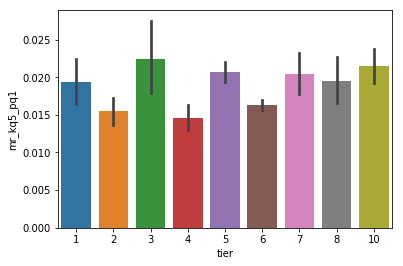

In [4]:
 ax = sns.barplot(x="tier", y="mr_kq5_pq1", data=sorted1)

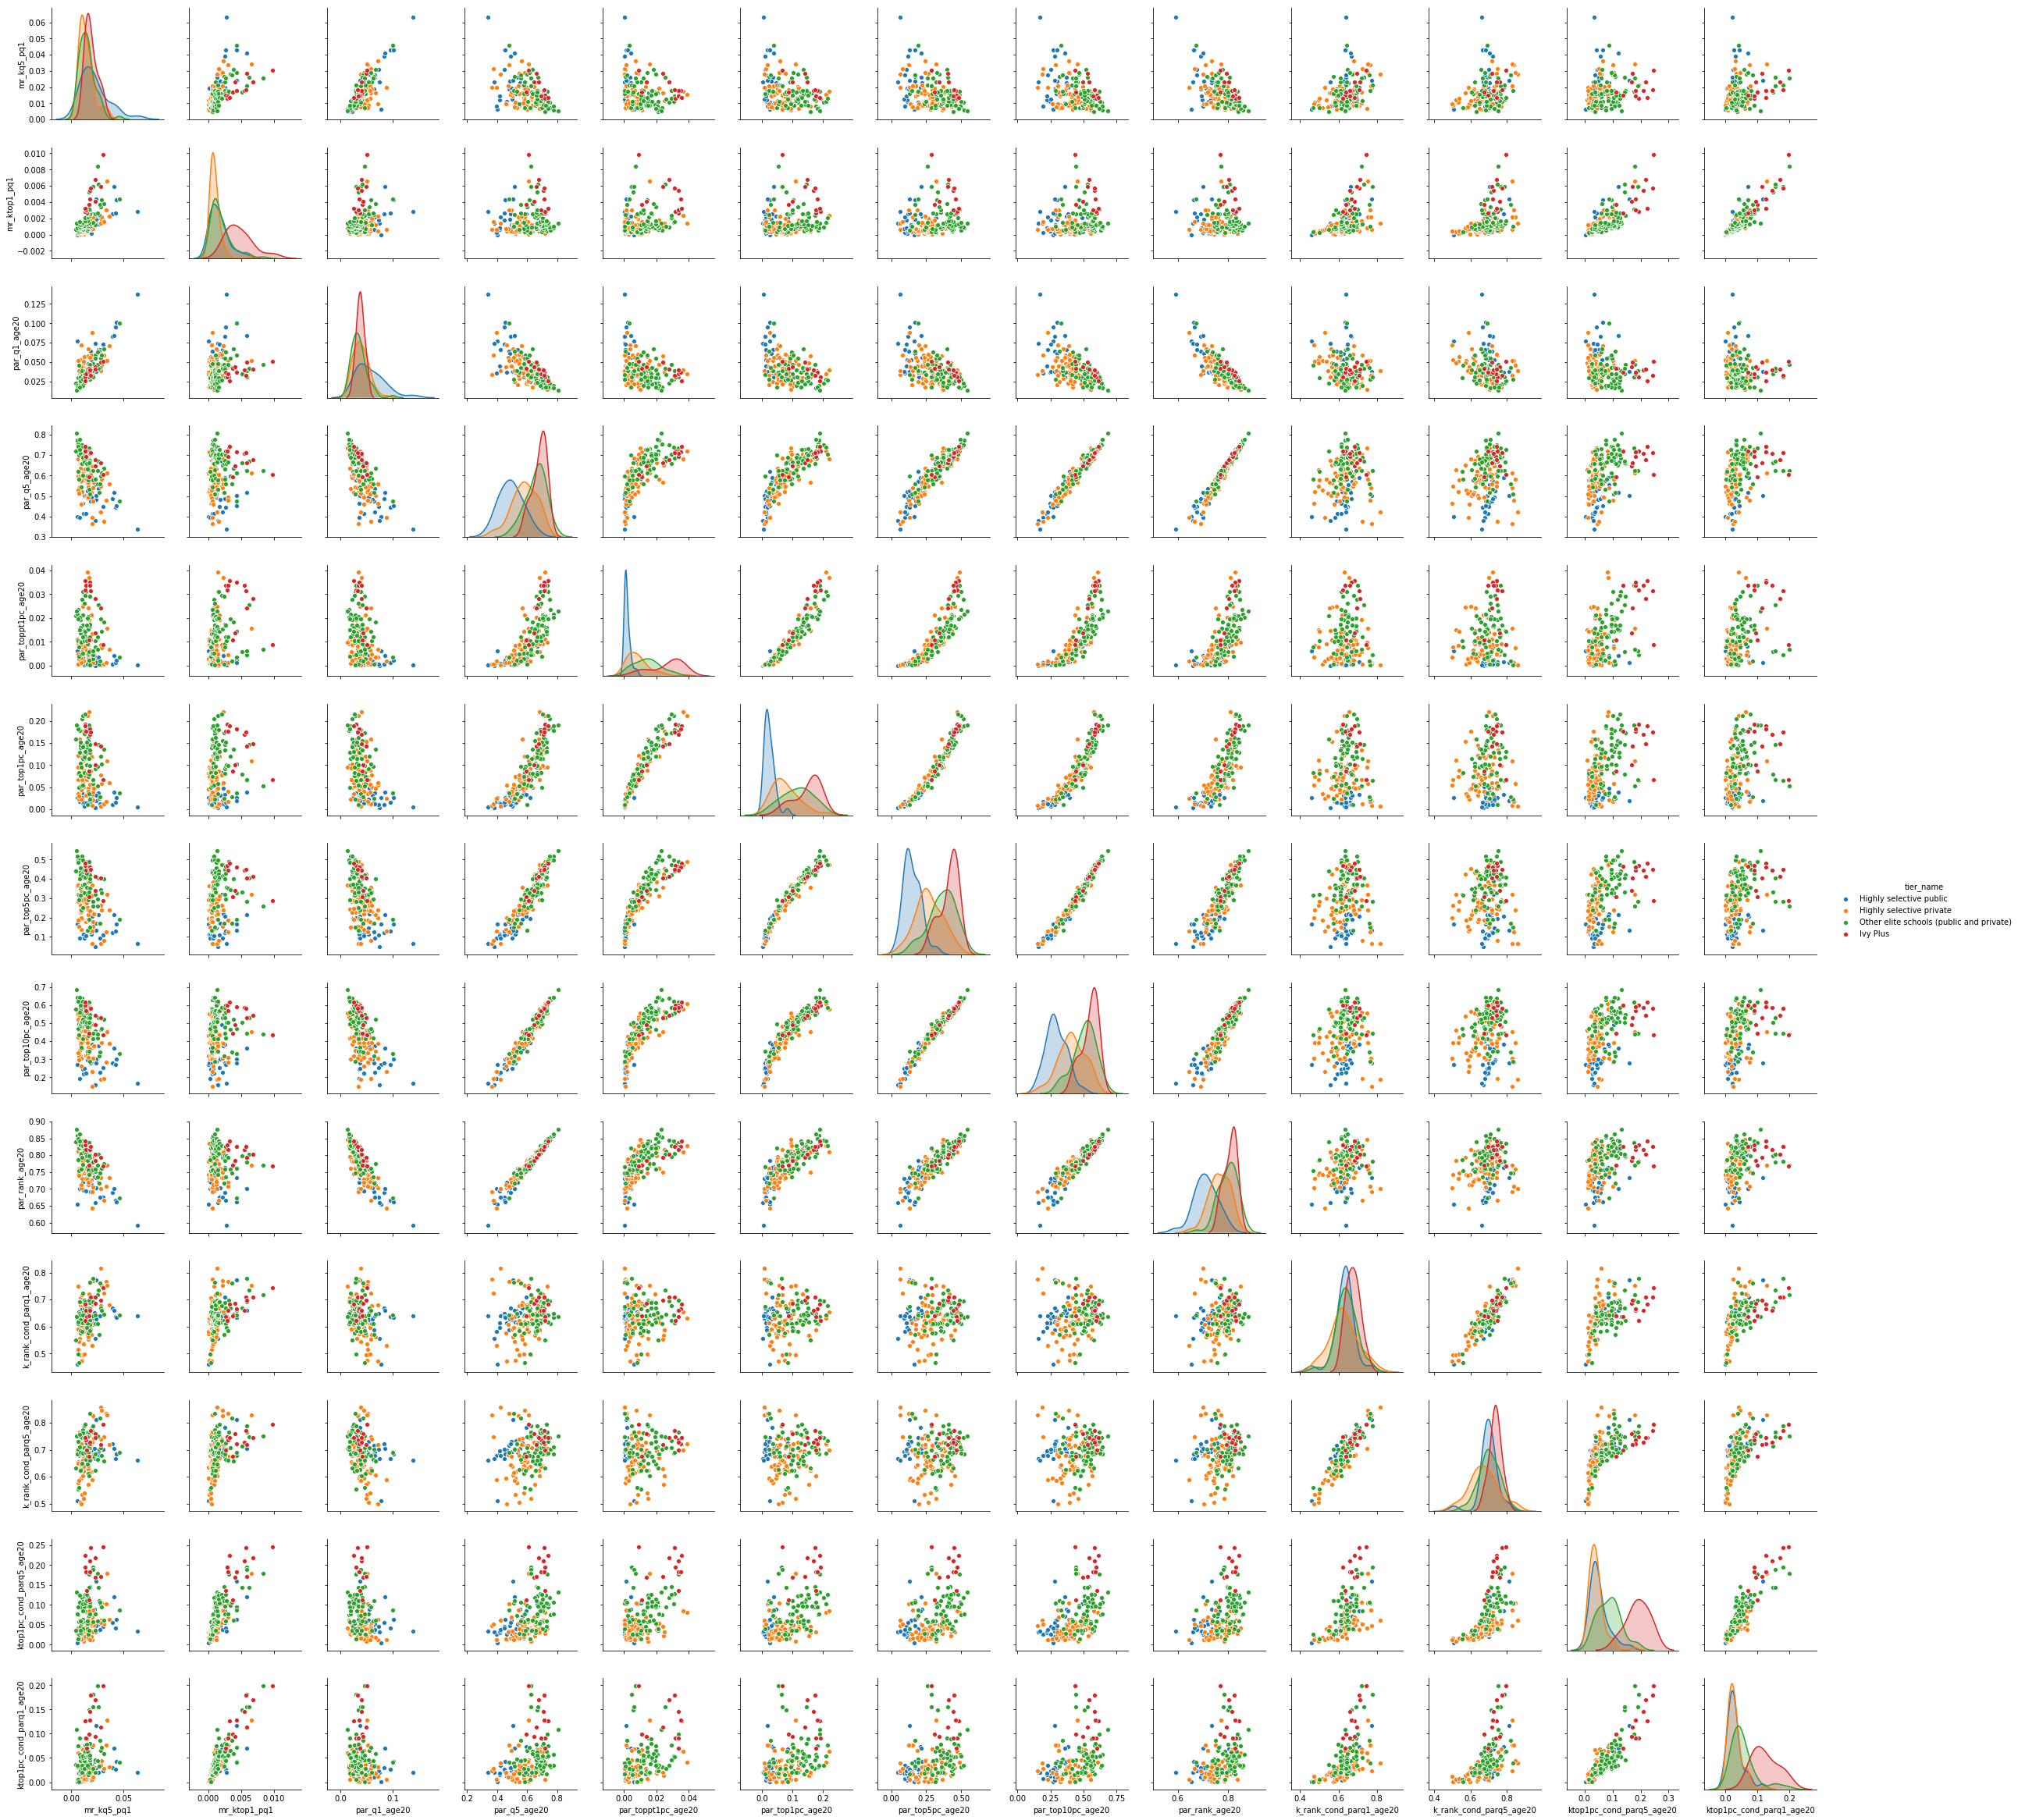

In [18]:
plot1 = sns.pairplot(highly_selective_mask, hue = 'tier_name')
                              



#ktop1pc_cond_parq(1-5)_f/m 
#mr_kq5_pq1_f/m
#mr_ktop1_pq1_f/m 

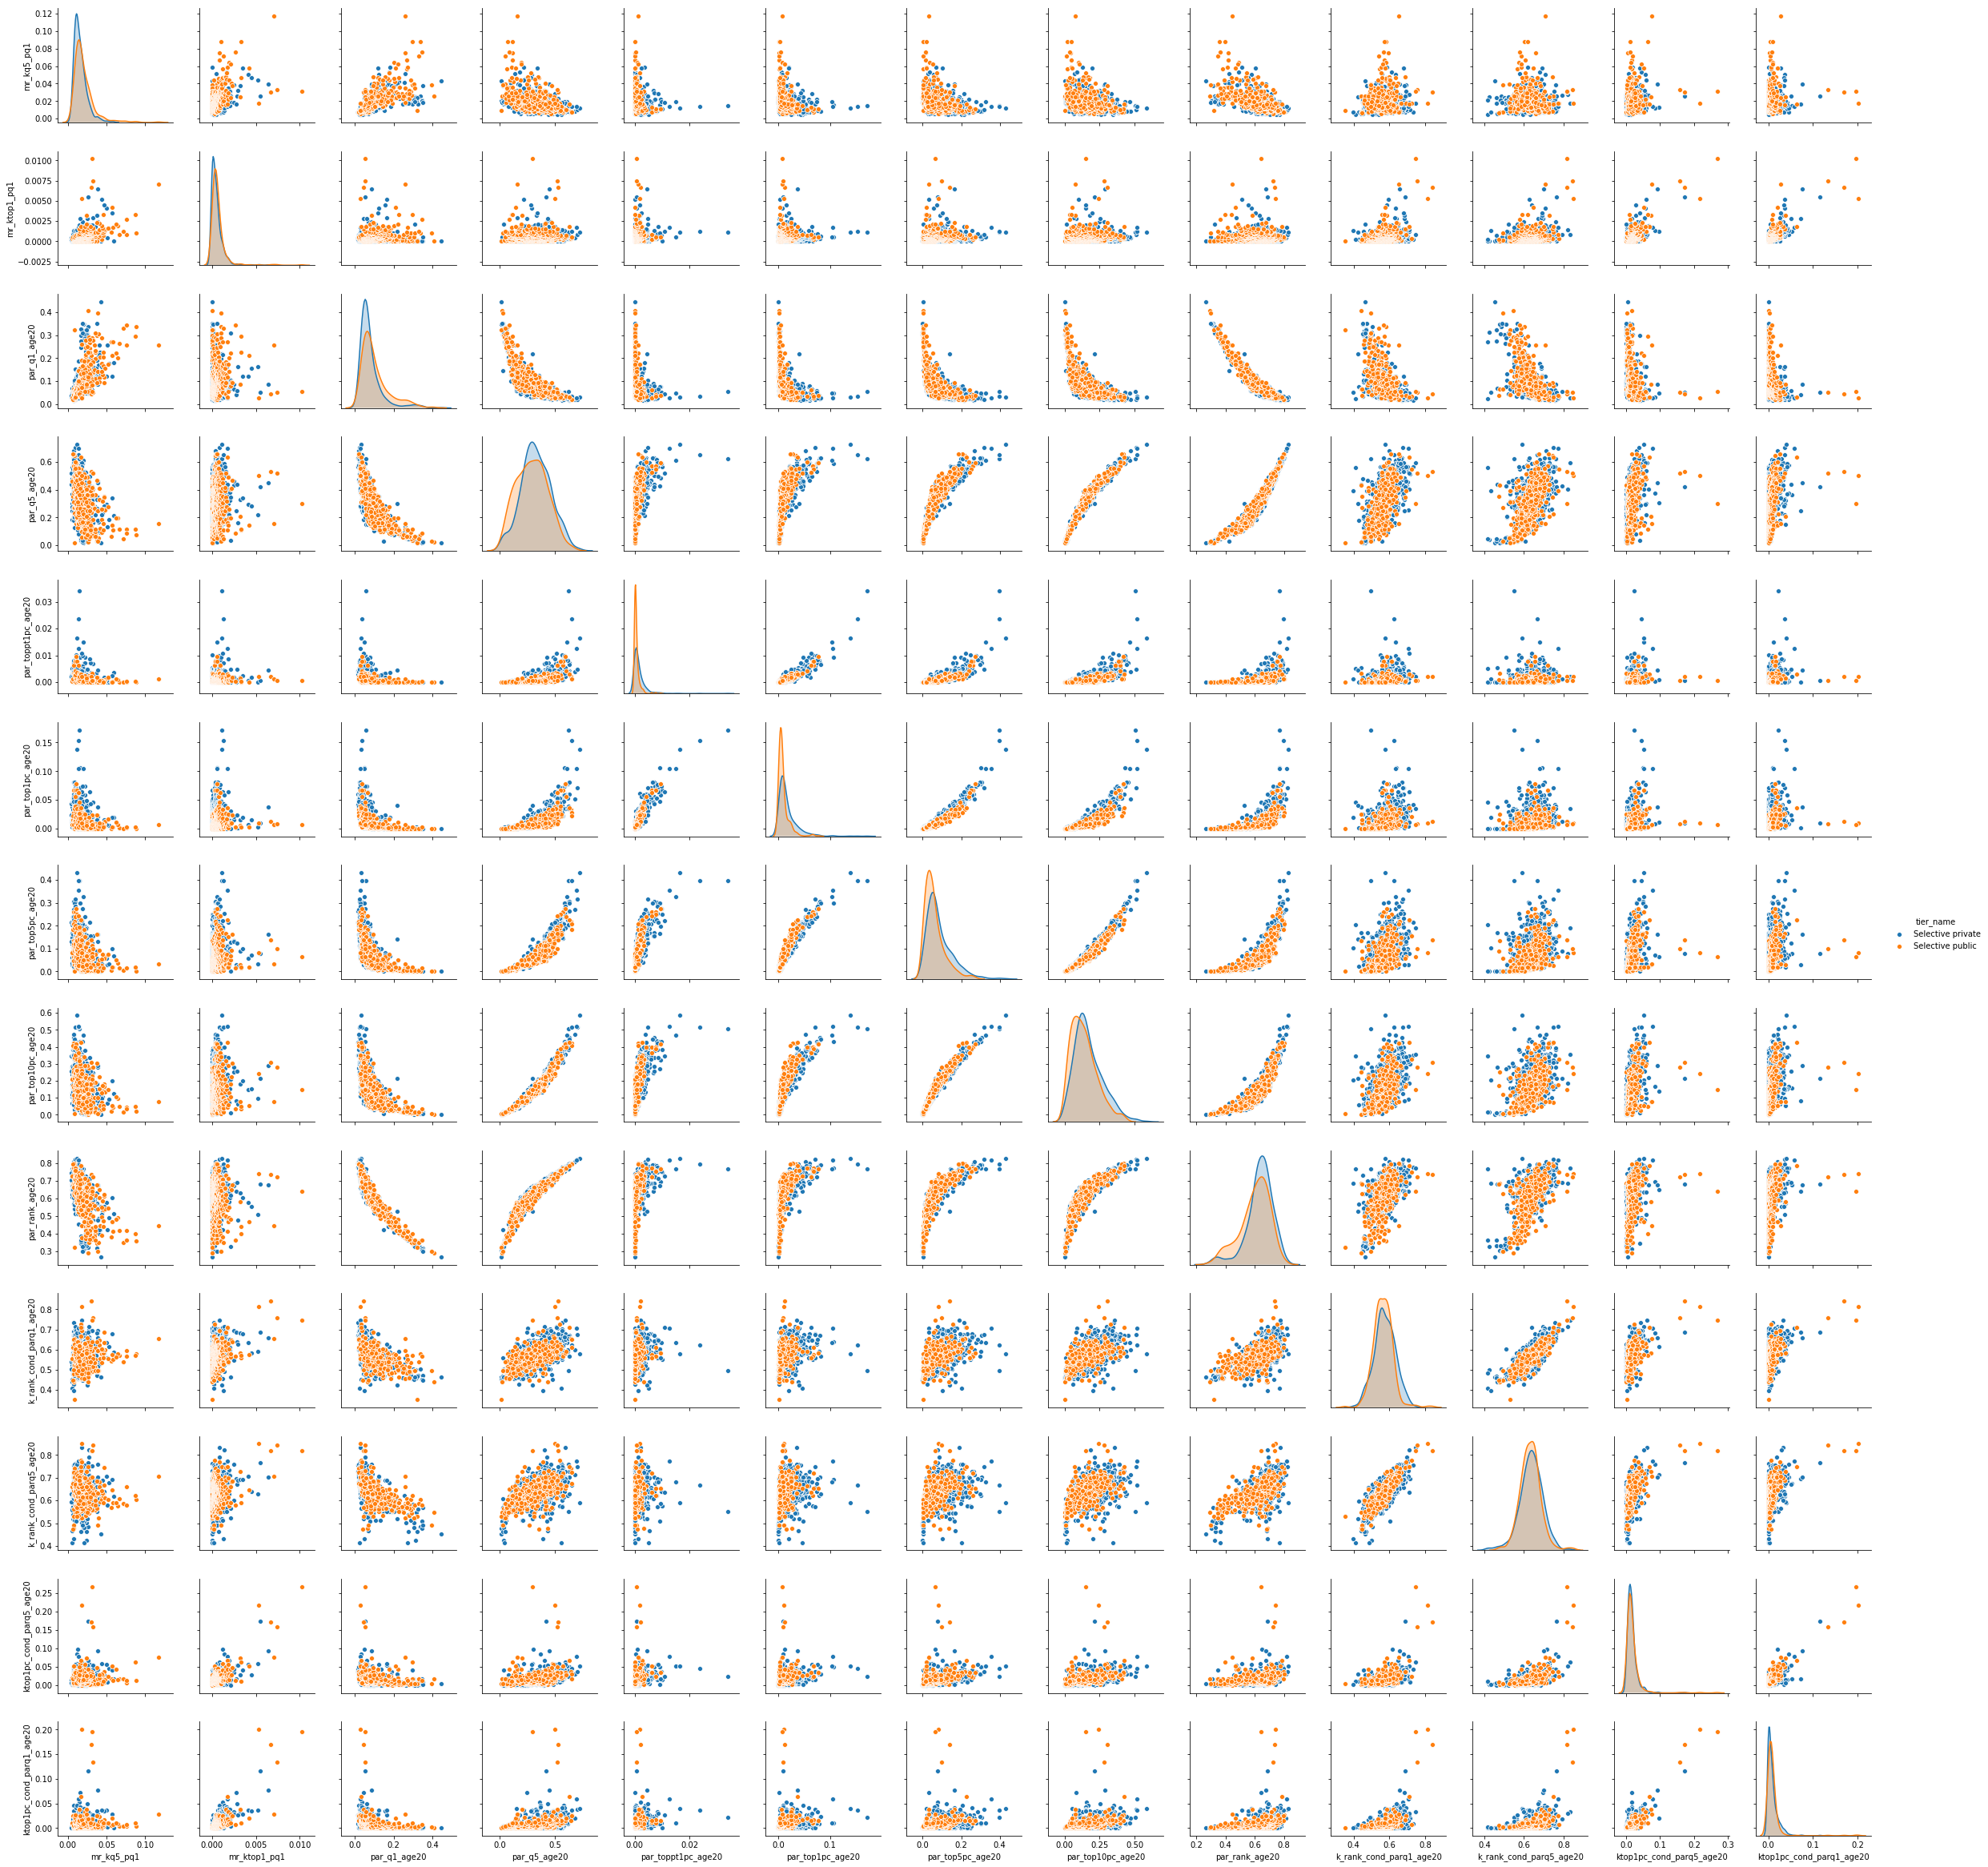

In [19]:
plot1 = sns.pairplot(selective_mask, hue = 'tier_name')

- Do females or males have more class mobility?
- Does college type have an effect on income mobility?
- Does geographic area (CZ) or tier have a bigger effect on income mobility?
- Which cohort was the most mobile? 
- When attending elite schools, does parent income still have an effect on child income? Do rich kids always earn more?
- Where are the rates of bottom-to-top quintile mobility the highest?

